In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


#Importing dataset

In [ ]:
df = pd.read_excel('/content/advertising_sales_data.xlsx')
print(df)

    Campaign     TV  Radio  Newspaper  Sales
0      camp1  230.1   37.8       69.2   22.1
1      camp2   44.5   39.3       45.1   10.4
2      camp3   17.2   45.9       69.3   12.0
3      camp4  151.5   41.3       58.5   16.5
4      camp5  180.8   10.8       58.4   17.9
..       ...    ...    ...        ...    ...
195  camp196   38.2    3.7       13.8    7.6
196  camp197   94.2    4.9        8.1   14.0
197  camp198  177.0    9.3        6.4   14.8
198  camp199  283.6   42.0       66.2   25.5
199  camp200  232.1    8.6        8.7   18.4

[200 rows x 5 columns]


In [ ]:

print(df.isnull().sum()) #Calculating the no of missing values


Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Radio'] = imputer.fit_transform(df[['Radio']])
print(df)
print("Missing values in 'Radio' column after imputation:", df.isnull().sum()) #Checking that no missing values if there after imputation

    Campaign     TV  Radio  Newspaper  Sales
0      camp1  230.1   37.8       69.2   22.1
1      camp2   44.5   39.3       45.1   10.4
2      camp3   17.2   45.9       69.3   12.0
3      camp4  151.5   41.3       58.5   16.5
4      camp5  180.8   10.8       58.4   17.9
..       ...    ...    ...        ...    ...
195  camp196   38.2    3.7       13.8    7.6
196  camp197   94.2    4.9        8.1   14.0
197  camp198  177.0    9.3        6.4   14.8
198  camp199  283.6   42.0       66.2   25.5
199  camp200  232.1    8.6        8.7   18.4

[200 rows x 5 columns]
Missing values in 'Radio' column after imputation: Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
#1.	What is the average amount spent on TV advertising in the dataset?

avgTVspend = df['TV'].mean()
print("Average amount spent on TV advertising:", avgTVspend)

Average amount spent on TV advertising: 147.0425


In [ ]:
#2.	What is the correlation between radio advertising expenditure and product sales?
corrradio_sales1 = df['Radio'].corr(df['Sales'])
print(f"\nCorrelation between radio advertising expenditure and sales: {corrradio_sales1:.2f}")



Correlation between radio advertising expenditure and sales: 0.35


In [ ]:
#3.	Which advertising medium has the highest impact on sales based on the dataset?
corrradio_sales2 = df['TV'].corr(df['Sales'])
print(f"\nCorrelation between TV advertising expenditure and sales: {corrradio_sales2:.2f}")
corrradio_sales3 = df['Newspaper'].corr(df['Sales'])
print(f"\nCorrelation between Newspaper advertising expenditure and sales: {corrradio_sales3:.2f}")



Correlation between TV advertising expenditure and sales: 0.90

Correlation between Newspaper advertising expenditure and sales: 0.16


#Hence TV advertising has the highest impact on sales

In [ ]:
#4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.
X1 = df[['TV','Radio','Newspaper']]
y1 = df['Sales']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2, random_state = 42)

print(X1_train.isnull().sum())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X1_train = imputer.fit_transform(X1_train)
print(X1_train)

print(X1_test.isnull().sum())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X1_test = imputer.fit_transform(X1_test)
print(X1_test)

TV           0
Radio        0
Newspaper    0
dtype: int64
[[116.           7.7         23.1       ]
 [177.           9.3          6.4       ]
 [ 43.1         26.7         35.1       ]
 [ 62.3         12.6         18.3       ]
 [224.           2.4         15.6       ]
 [ 38.2          3.7         13.8       ]
 [ 70.6         16.          40.8       ]
 [147.3         23.26060606  19.1       ]
 [104.6          5.7         34.4       ]
 [ 76.3         27.5         16.        ]
 [ 78.2         46.8         34.5       ]
 [168.4          7.1         12.8       ]
 [  8.7         48.9         75.        ]
 [  7.8         38.9         50.6       ]
 [ 76.4          0.8         14.8       ]
 [129.4          5.7         31.3       ]
 [ 73.4         17.          12.9       ]
 [289.7         42.3         51.2       ]
 [ 19.6         20.1         17.        ]
 [197.6          3.5          5.9       ]
 [284.3         10.6          6.4       ]
 [184.9         21.          22.        ]
 [112.9         17

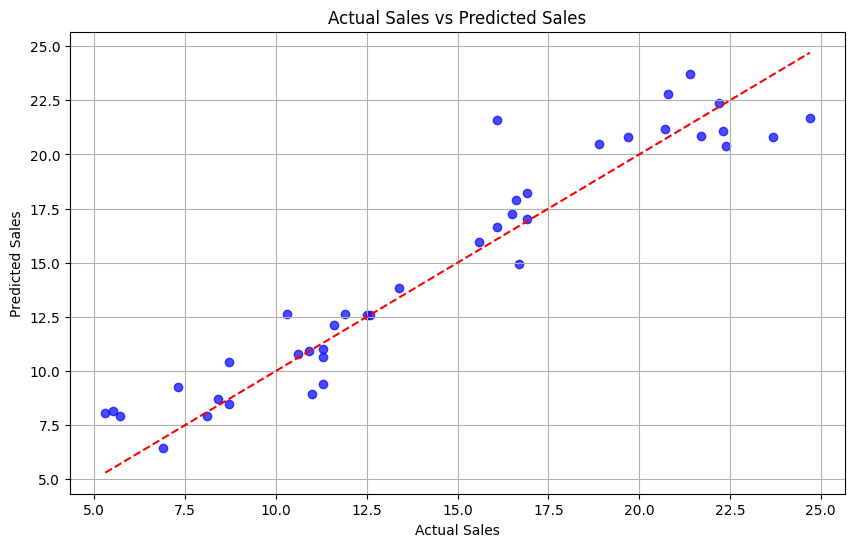


Model Coefficients:
TV: 0.05
Radio: 0.10
Newspaper: 0.00


In [ ]:
#There was an error showing that X1_train and X1_test contain NaN values, so I again implemented imputation on X1_train and X1_test to fill the missing values.

lr = LinearRegression()
lr.fit(X1_train,y1_train)

y1_pred = lr.predict(X1_test)

plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, alpha=0.7, color='blue')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--r')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

print("\nModel Coefficients:")
for feature, coef in zip(['TV', 'Radio', 'Newspaper'], lr.coef_):
    print(f"{feature}: {coef:.2f}")

In [ ]:
# Q5: Predict sales for new advertising expenditures
Hta = np.array([[200, 40, 50]])  # $200 on TV, $40 on Radio, $50 on Newspaper
sales_pred = lr.predict(Hta)
print(f"\nPredicted sales for TV=$200, Radio=$40, Newspaper=$50: {sales_pred[0]:.2f}")



Predicted sales for TV=$200, Radio=$40, Newspaper=$50: 19.87


[[-4.04248386e-01 -1.02797963e+00 -3.37675384e-01]
 [ 3.20607716e-01 -9.19568893e-01 -1.16143931e+00]
 [-1.27051084e+00  2.59397831e-01  2.54250789e-01]
 [-1.04235941e+00 -6.95971755e-01 -5.74445854e-01]
 [ 8.79103401e-01 -1.38709018e+00 -7.07629243e-01]
 [-1.32873699e+00 -1.29900646e+00 -7.96418169e-01]
 [-9.43731452e-01 -4.65598947e-01  5.35415722e-01]
 [-3.23140256e-02  2.63558196e-02 -5.34984109e-01]
 [-5.39713297e-01 -1.16349304e+00  2.19721762e-01]
 [-8.75998996e-01  3.13603198e-01 -6.87898371e-01]
 [-8.53421511e-01  1.62130767e+00  2.24654481e-01]
 [ 2.18414888e-01 -1.06863365e+00 -8.45745350e-01]
 [-1.67928215e+00  1.76359676e+00  2.22240532e+00]
 [-1.68997675e+00  1.08602967e+00  1.01882210e+00]
 [-8.74810708e-01 -1.49550091e+00 -7.47090988e-01]
 [-2.45017701e-01 -1.16349304e+00  6.68075010e-02]
 [-9.10459368e-01 -3.97842239e-01 -8.40812632e-01]
 [ 1.65980907e+00  1.31640248e+00  1.04841841e+00]
 [-1.54975868e+00 -1.87796443e-01 -6.38571189e-01]
 [ 5.65395186e-01 -1.31255780e+

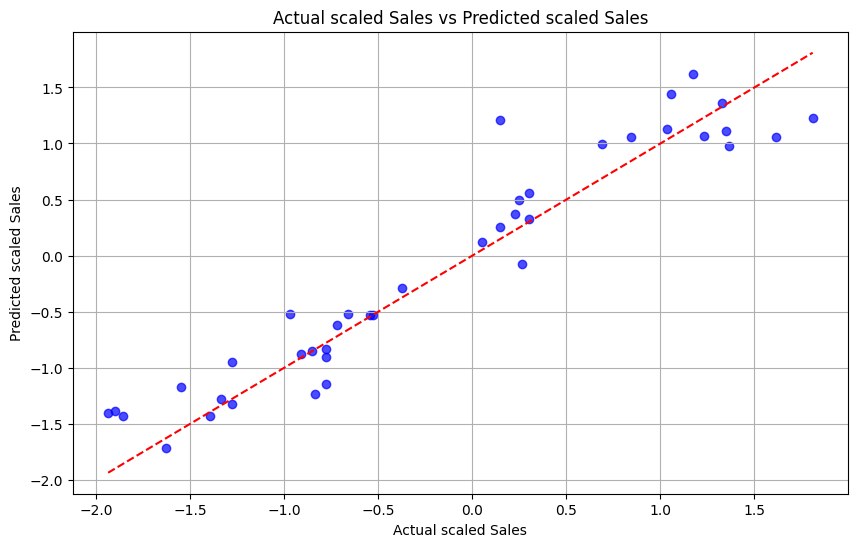

In [ ]:
#6.	How does the performance of the linear regression model change when the dataset is normalized?

scaler = StandardScaler()
X1_scaled_train = scaler.fit_transform(X1_train)
X1_scaled_test = scaler.transform(X1_test)
print(X1_scaled_train)
print(X1_scaled_test)
y1_scaled_train = scaler.fit_transform(y1_train.values.reshape(-1, 1))
y1_scaled_test = scaler.transform(y1_test.values.reshape(-1, 1))
lr.fit(X1_scaled_train,y1_scaled_train)
y1_pred_scaled = lr.predict(X1_scaled_test)

plt.figure(figsize=(10, 6))
plt.scatter(y1_scaled_test, y1_pred_scaled, alpha=0.7, color='blue')
plt.plot([y1_scaled_test.min(), y1_scaled_test.max()], [y1_scaled_test.min(), y1_scaled_test.max()], '--r')
plt.title('Actual scaled Sales vs Predicted scaled Sales')
plt.xlabel('Actual scaled Sales')
plt.ylabel('Predicted scaled Sales')
plt.grid(True)
plt.show()



R² using only Radio and Newspaper: 0.11


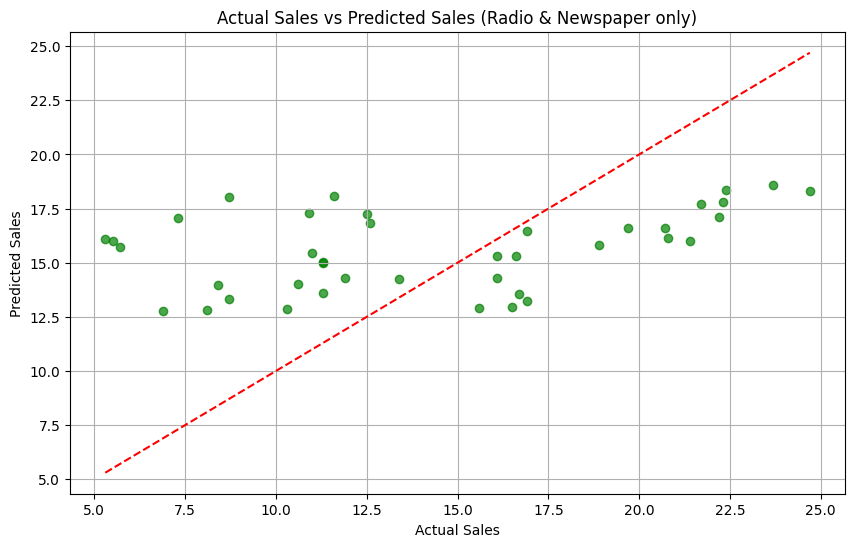

In [ ]:
#7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

X_radio_newspaper = df[['Radio', 'Newspaper']]

# Split data
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_radio_newspaper, y1, test_size=0.2, random_state=42)

# Fit the model
model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)

# Evaluate the new model
y_pred_rn = model_rn.predict(X_test_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)
print(f"\nR² using only Radio and Newspaper: {r2_rn:.2f}")

# Visualize the reduced model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rn, y_pred_rn, alpha=0.7, color='green')
plt.plot([y_test_rn.min(), y_test_rn.max()], [y_test_rn.min(), y_test_rn.max()], '--r')
plt.title('Actual Sales vs Predicted Sales (Radio & Newspaper only)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()